In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm

local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 617 ms, sys: 108 ms, total: 726 ms
Wall time: 2.31 s


(1100, 1)

Inferring:   0%|                                                                                 | 0/20 [00:00<?, ?it/s]

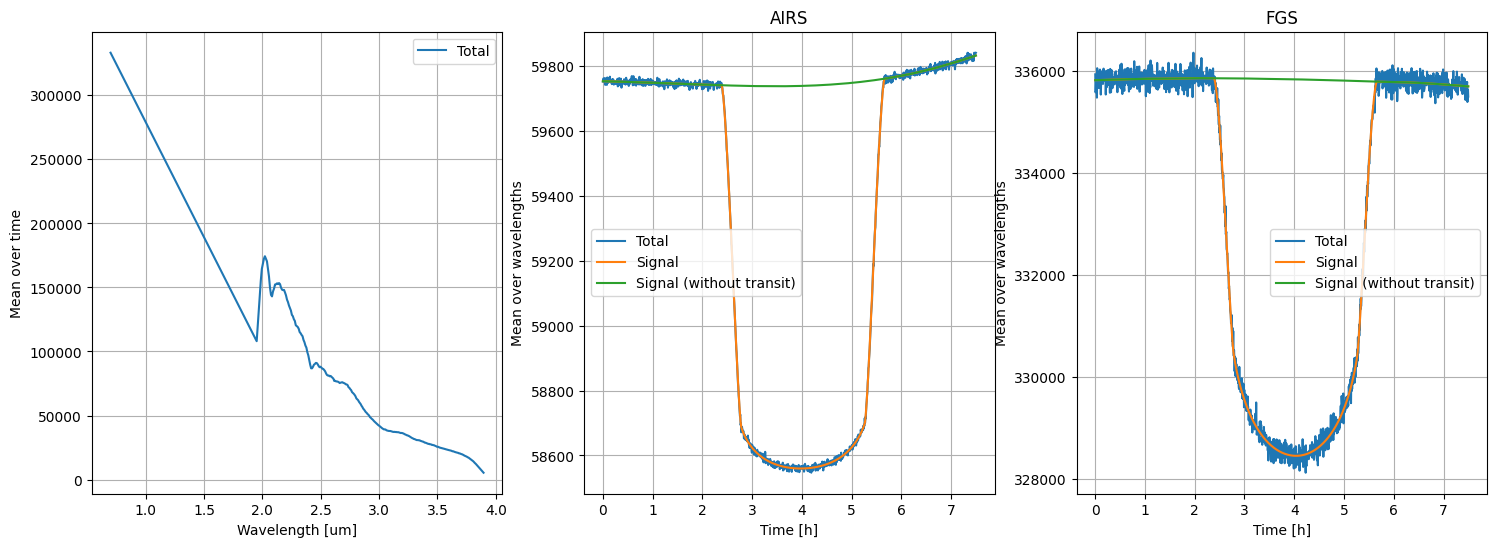

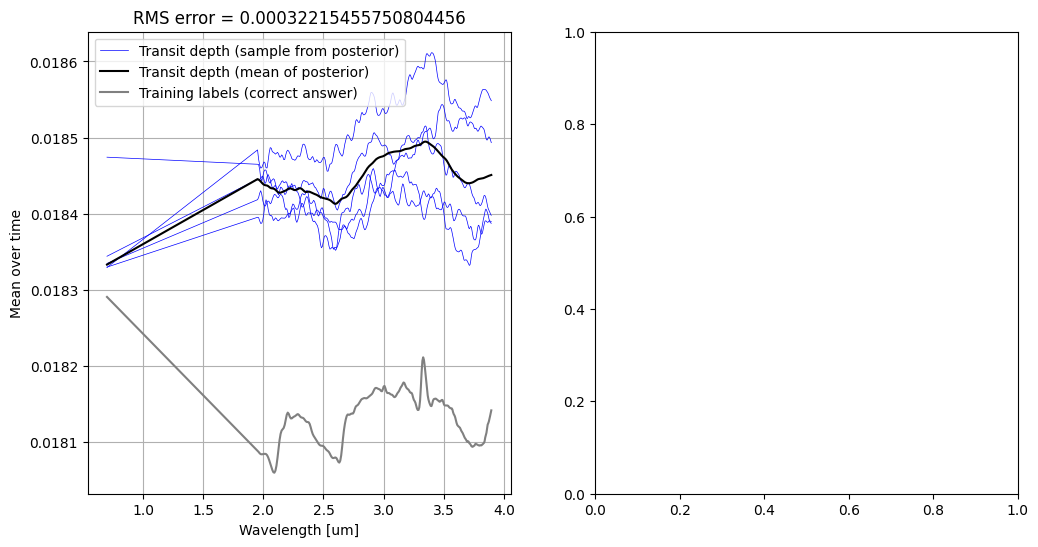

Inferring:   5%|███▋                                                                     | 1/20 [00:39<12:36, 39.79s/it]

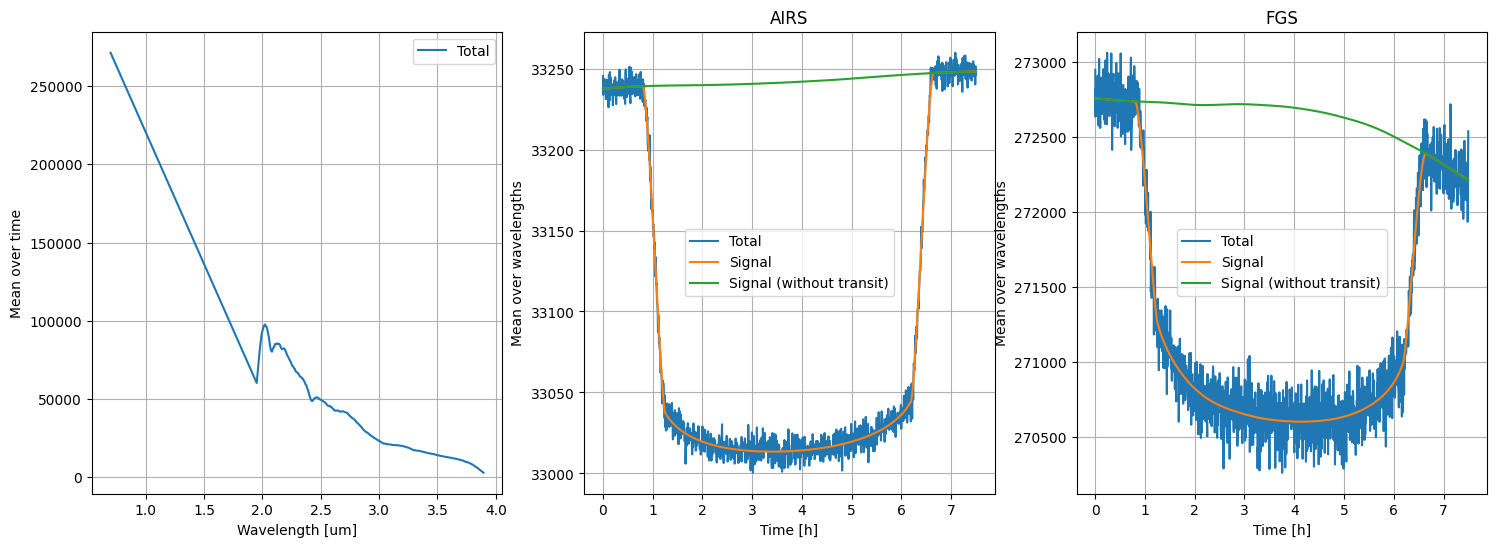

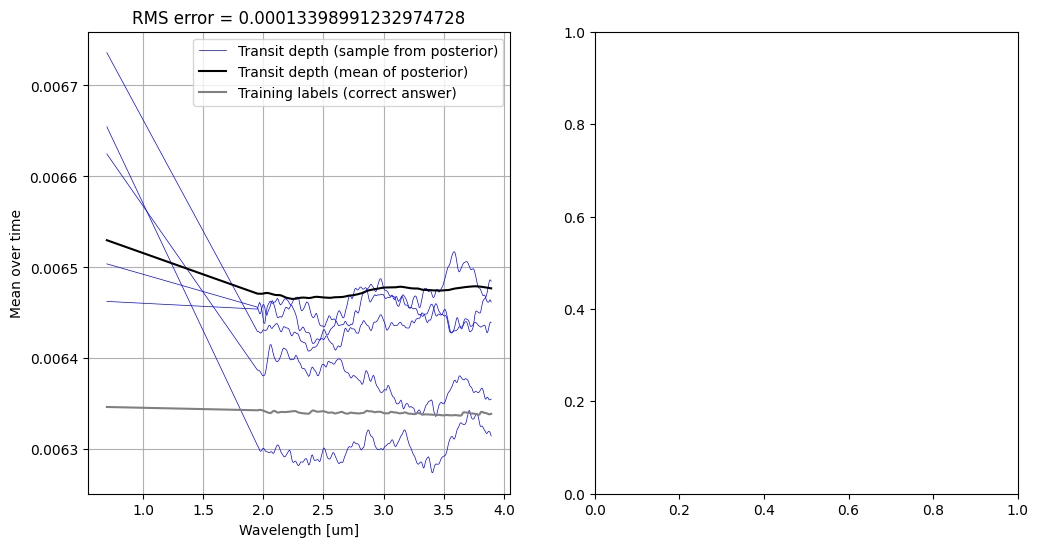

Inferring:  10%|███████▎                                                                 | 2/20 [01:18<11:44, 39.11s/it]

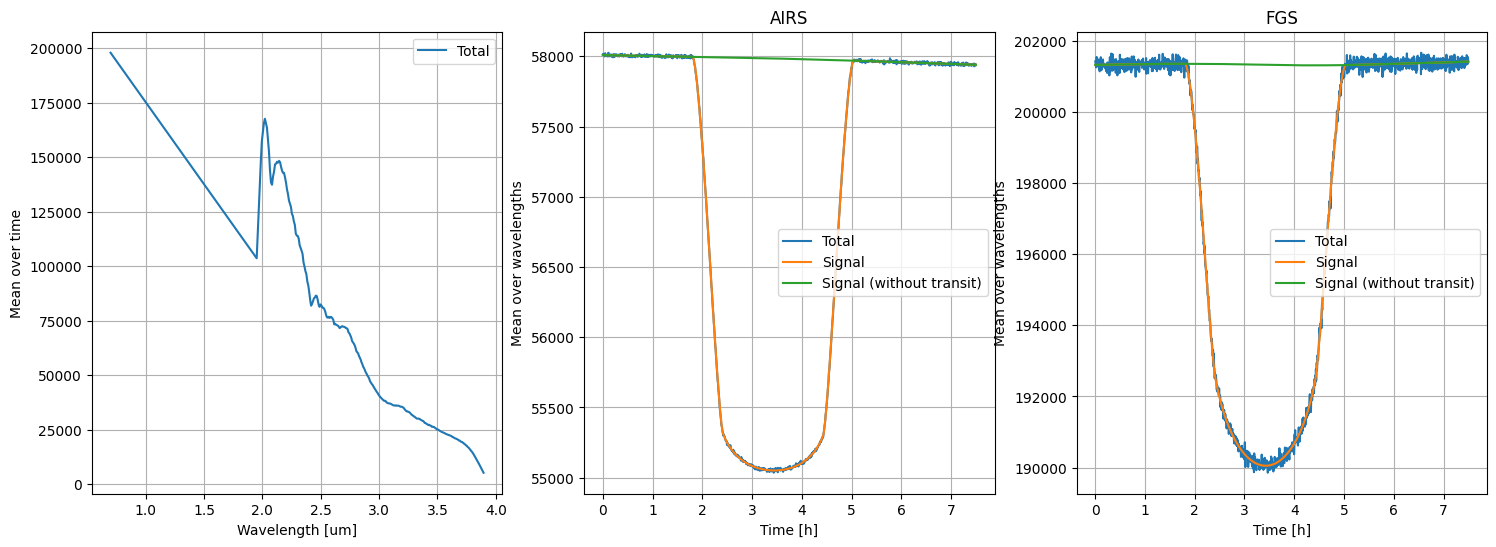

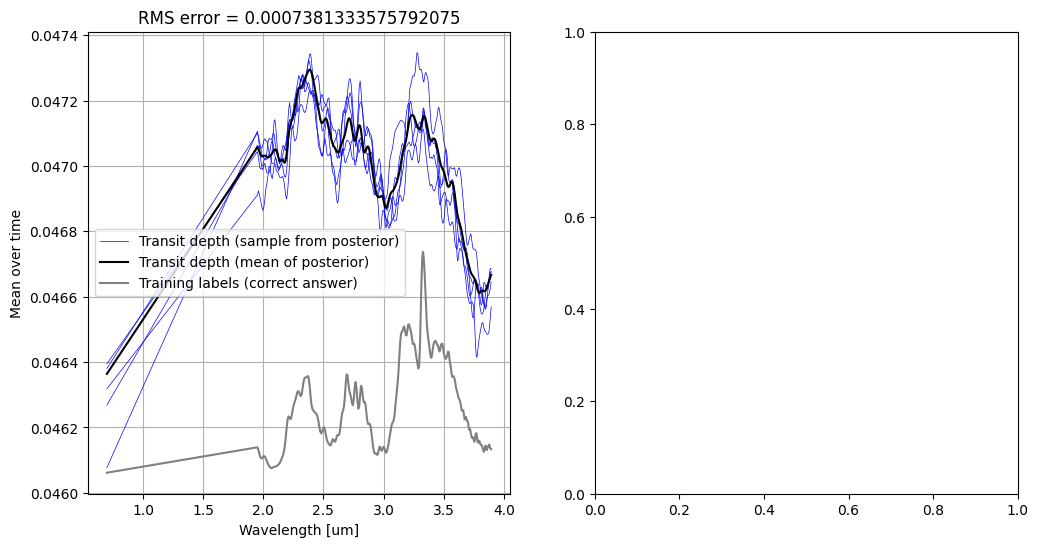

Inferring:  15%|██████████▉                                                              | 3/20 [01:57<11:06, 39.20s/it]

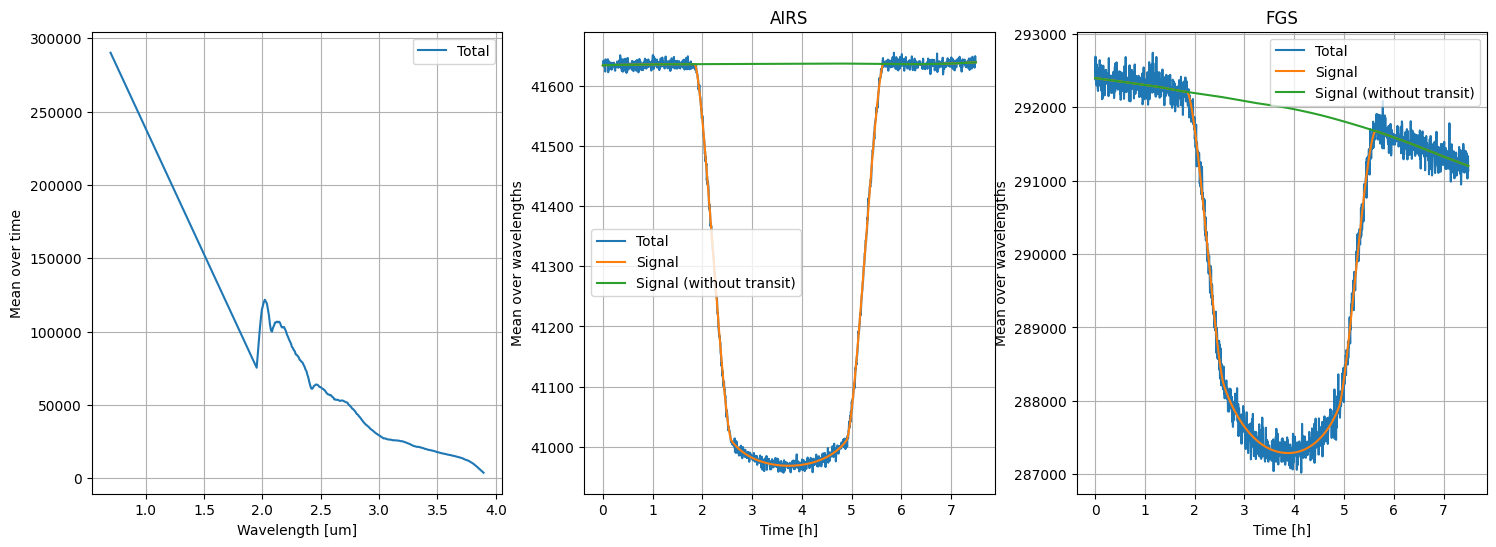

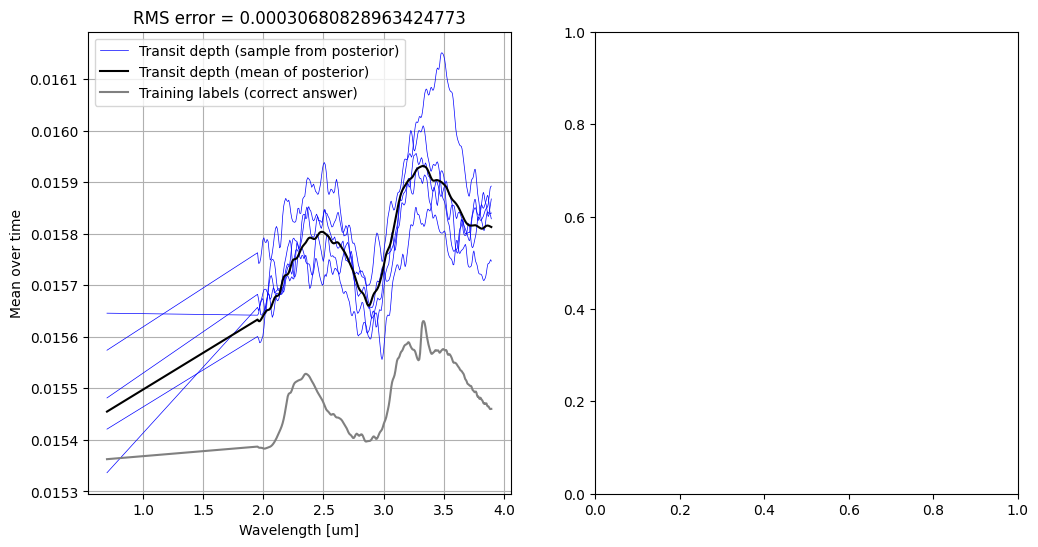

Inferring:  20%|██████████████▌                                                          | 4/20 [02:37<10:29, 39.37s/it]

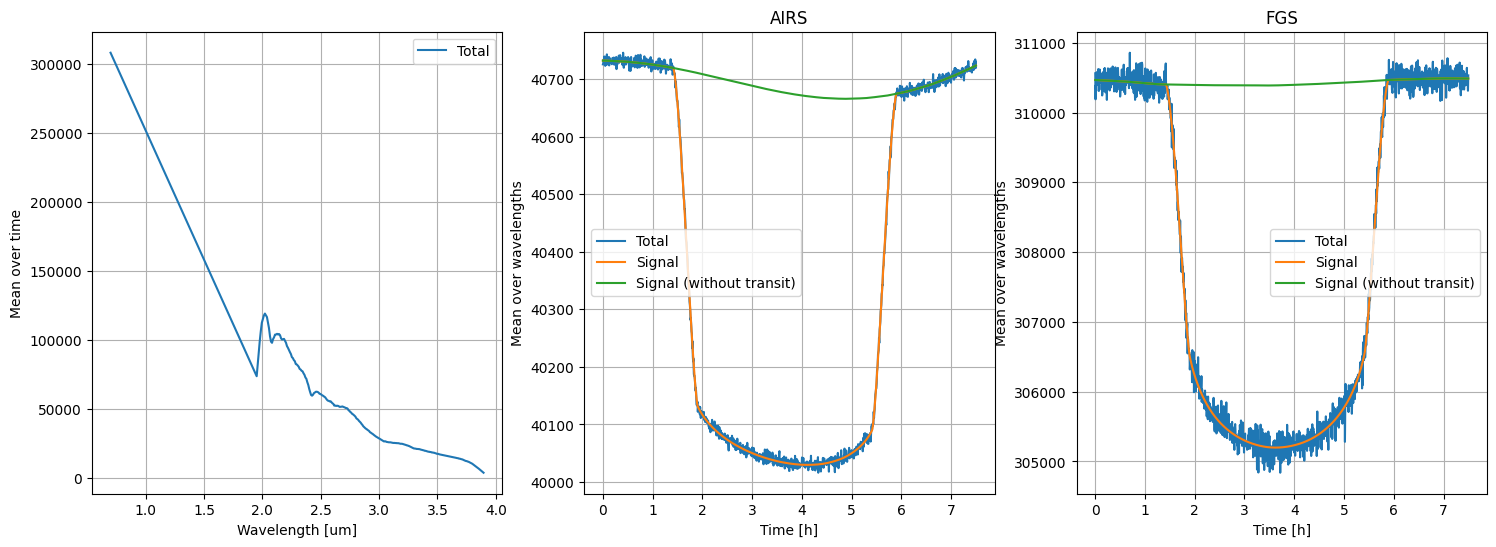

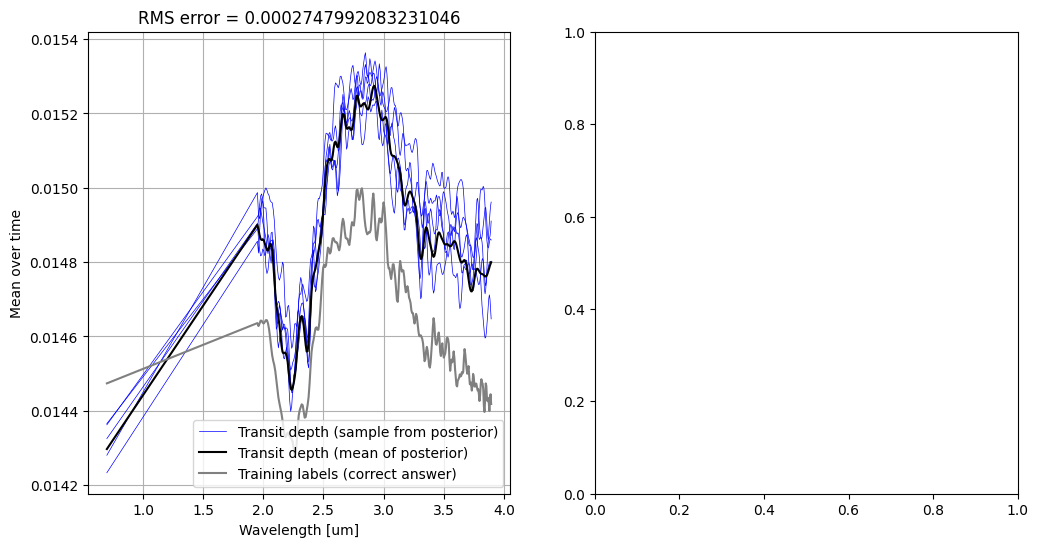

Inferring:  25%|██████████████████▎                                                      | 5/20 [03:15<09:46, 39.08s/it]

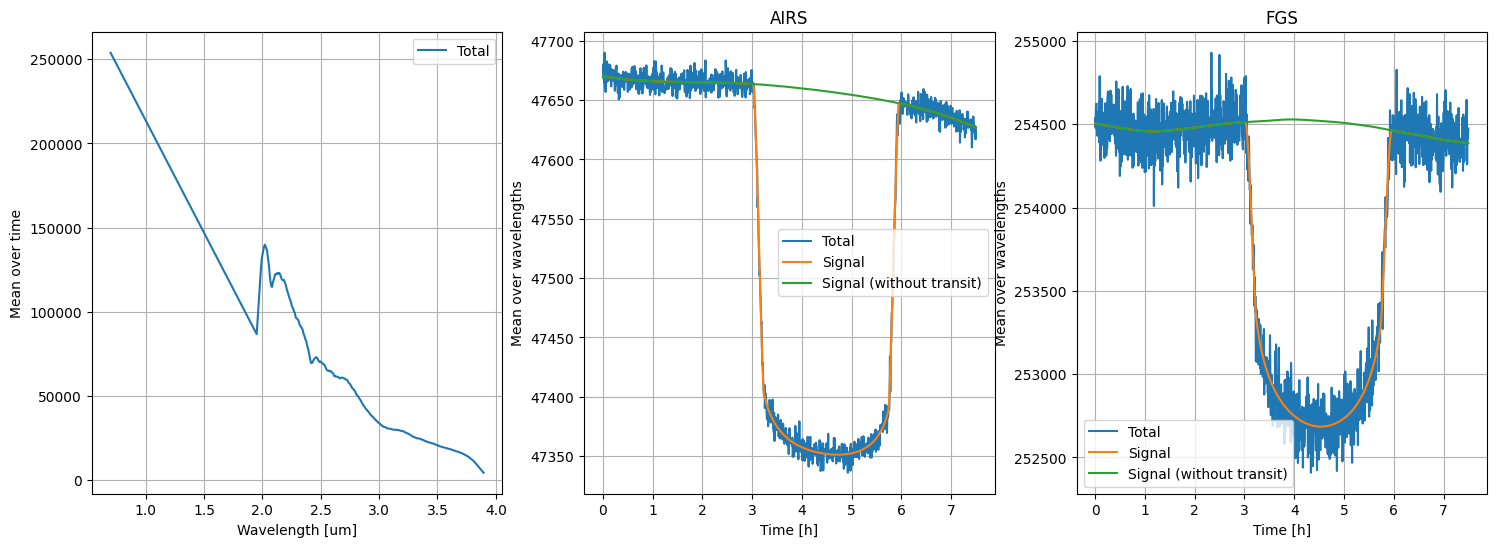

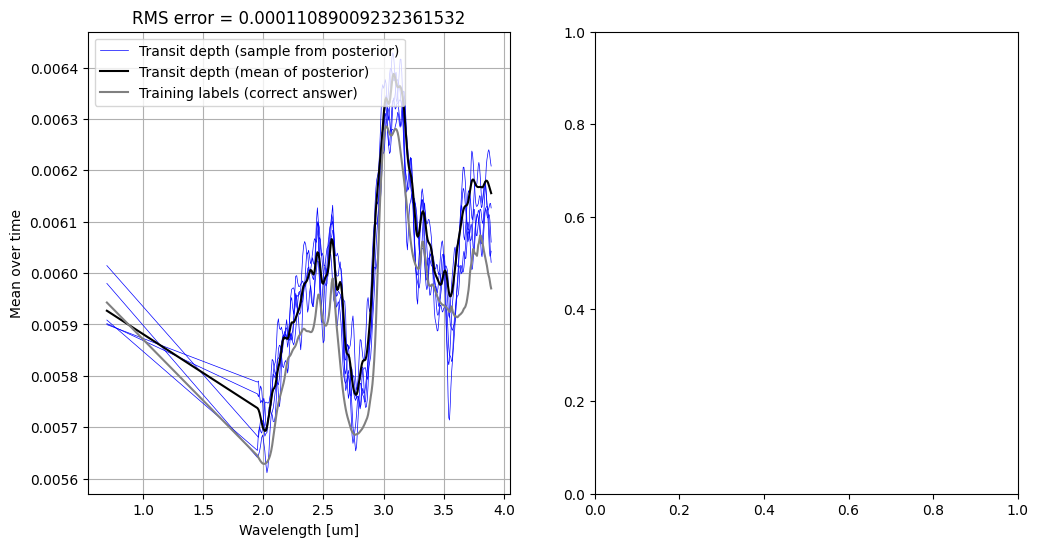

Inferring:  30%|█████████████████████▉                                                   | 6/20 [03:54<09:06, 39.03s/it]

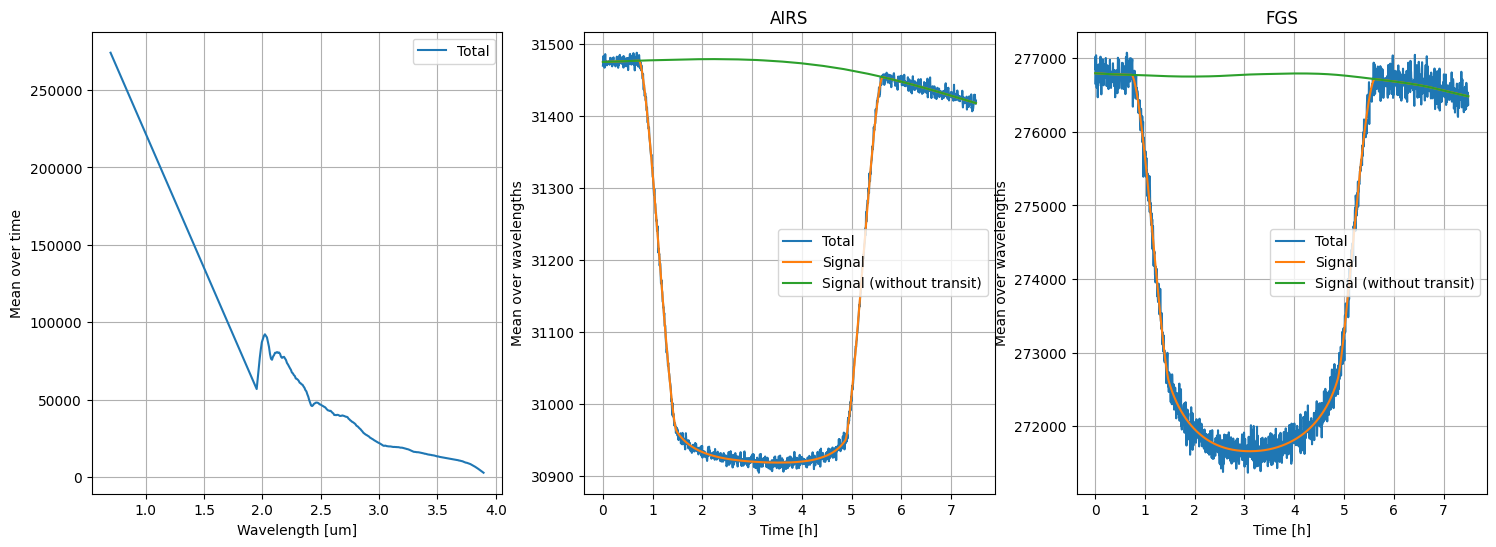

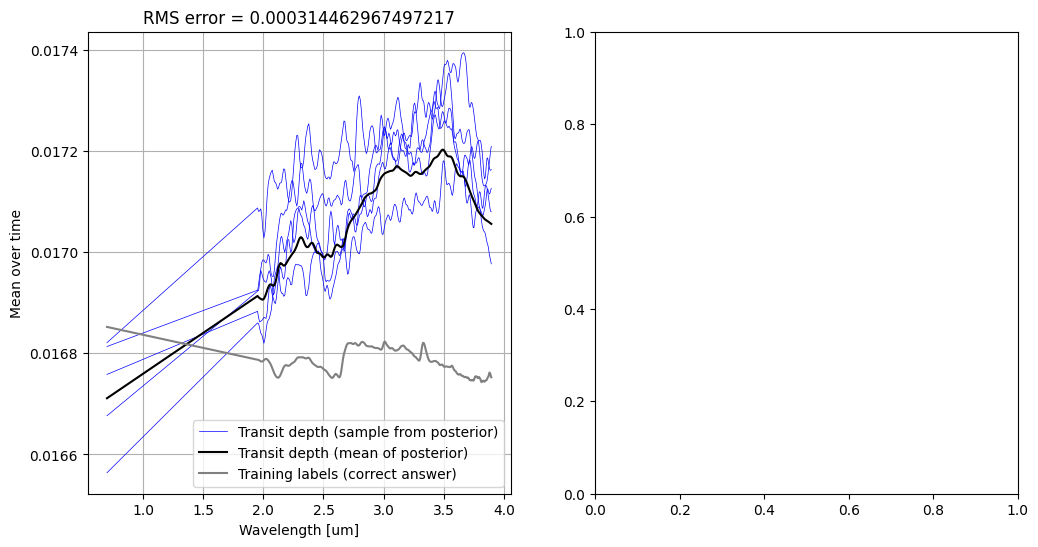

Inferring:  35%|█████████████████████████▌                                               | 7/20 [04:35<08:31, 39.33s/it]

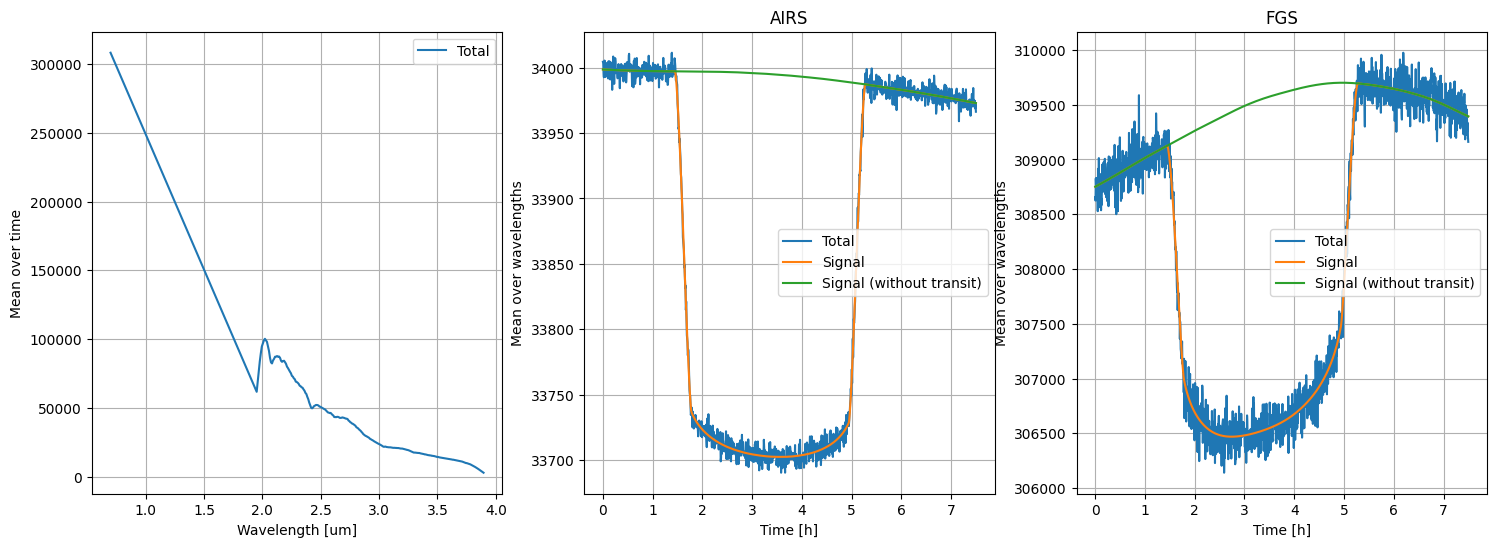

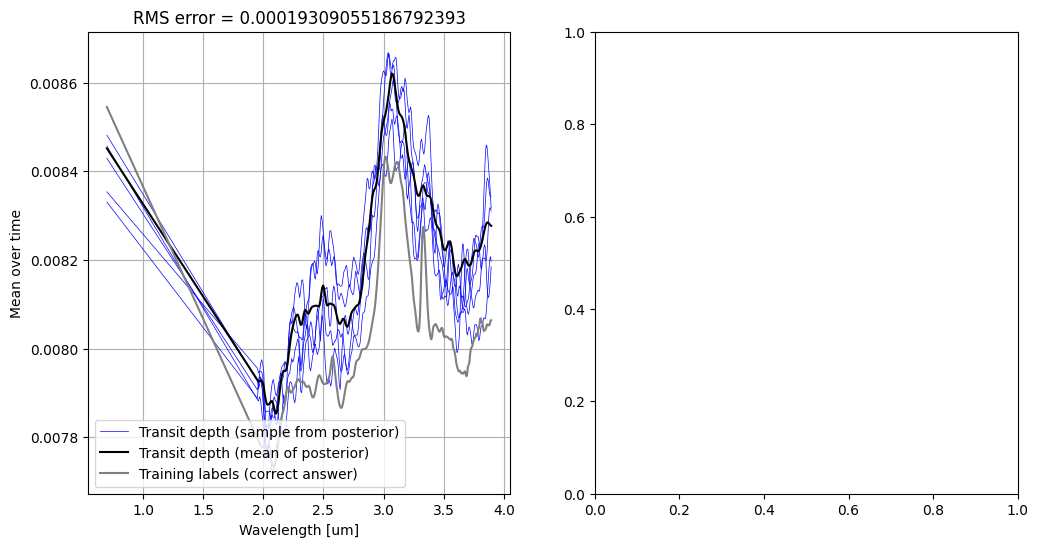

Inferring:  40%|█████████████████████████████▏                                           | 8/20 [05:13<07:50, 39.18s/it]

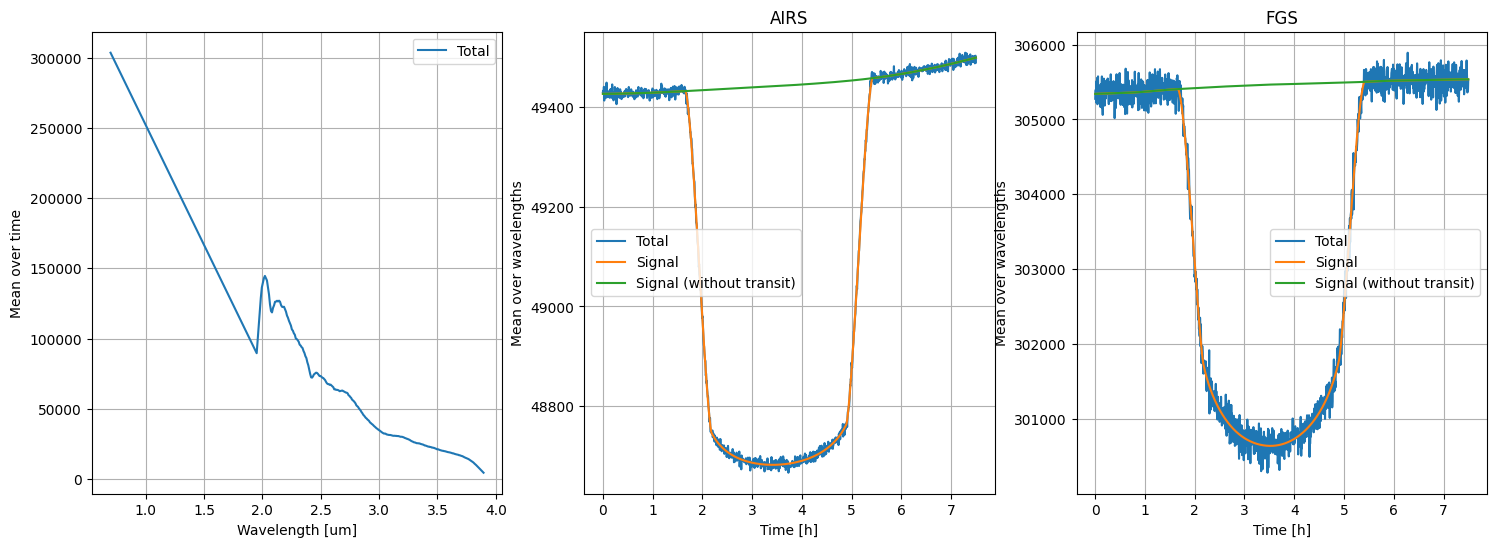

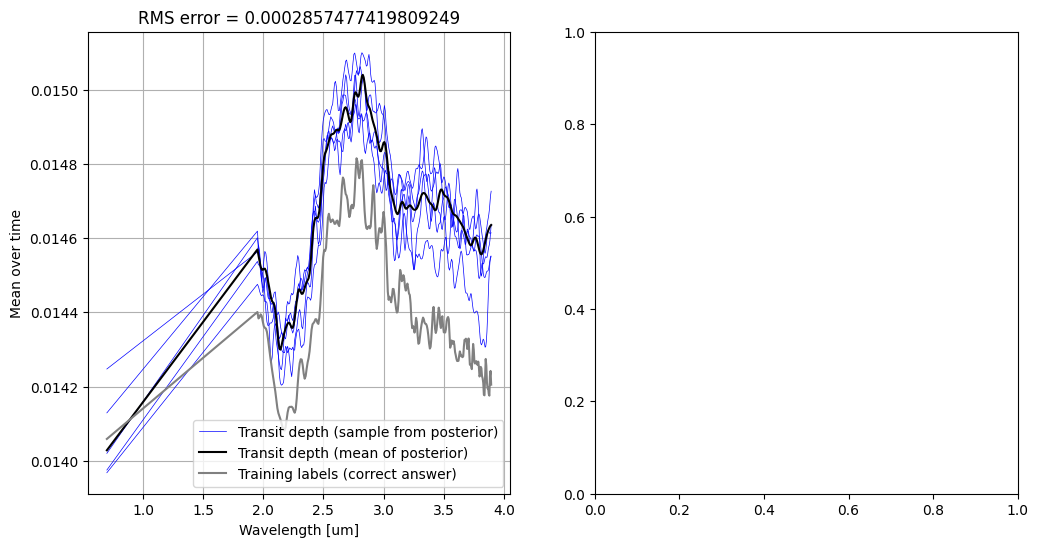

Inferring:  45%|████████████████████████████████▊                                        | 9/20 [05:48<07:04, 38.57s/it]

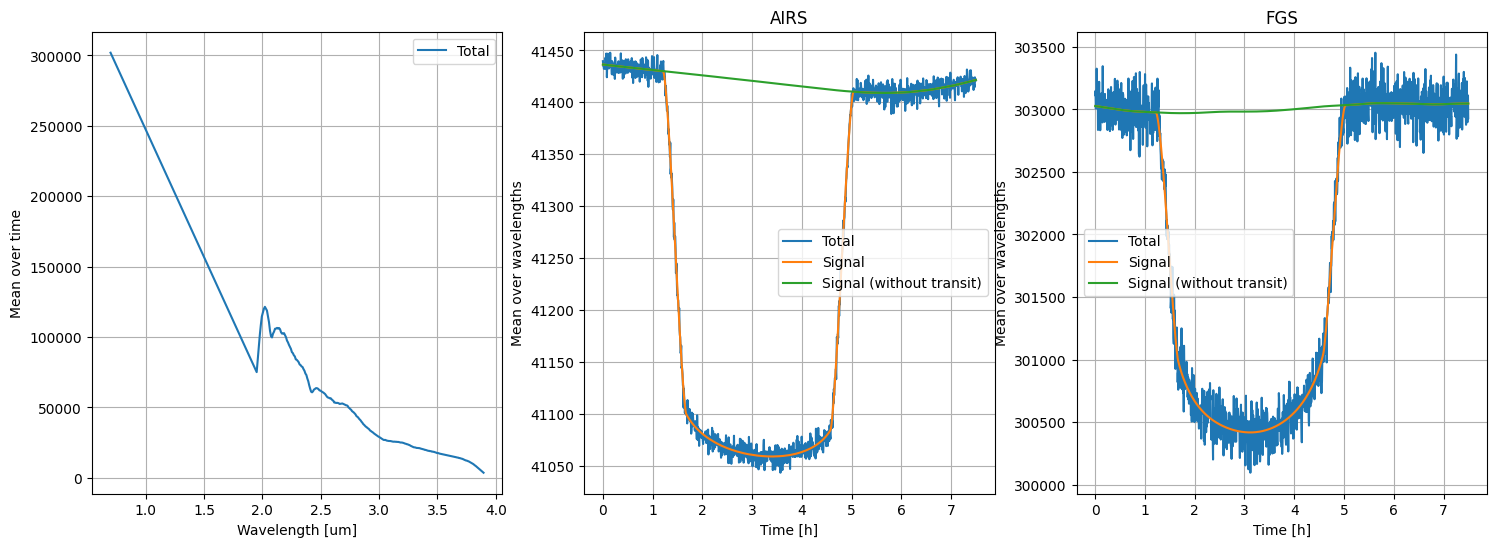

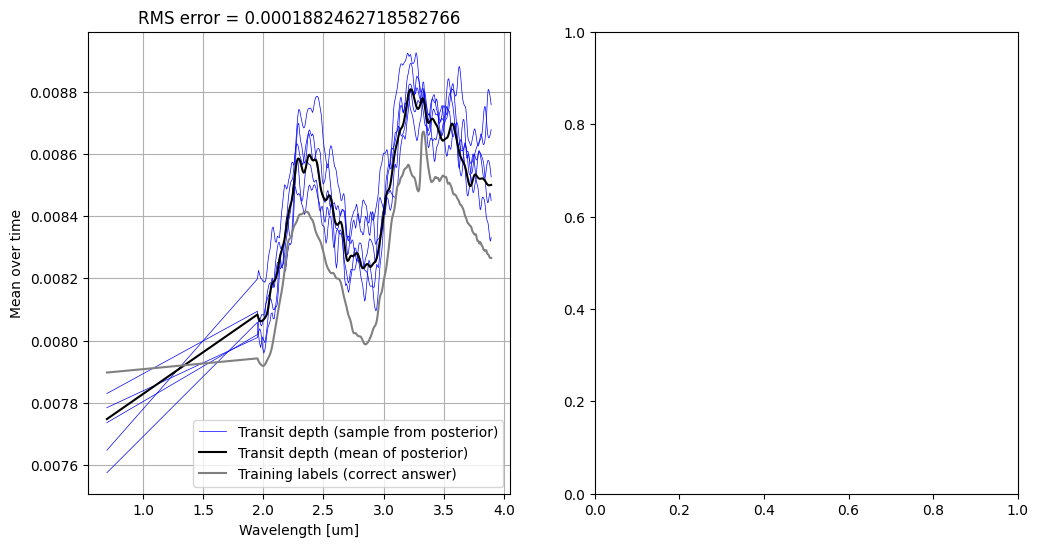

Inferring:  50%|████████████████████████████████████                                    | 10/20 [06:28<06:27, 38.78s/it]

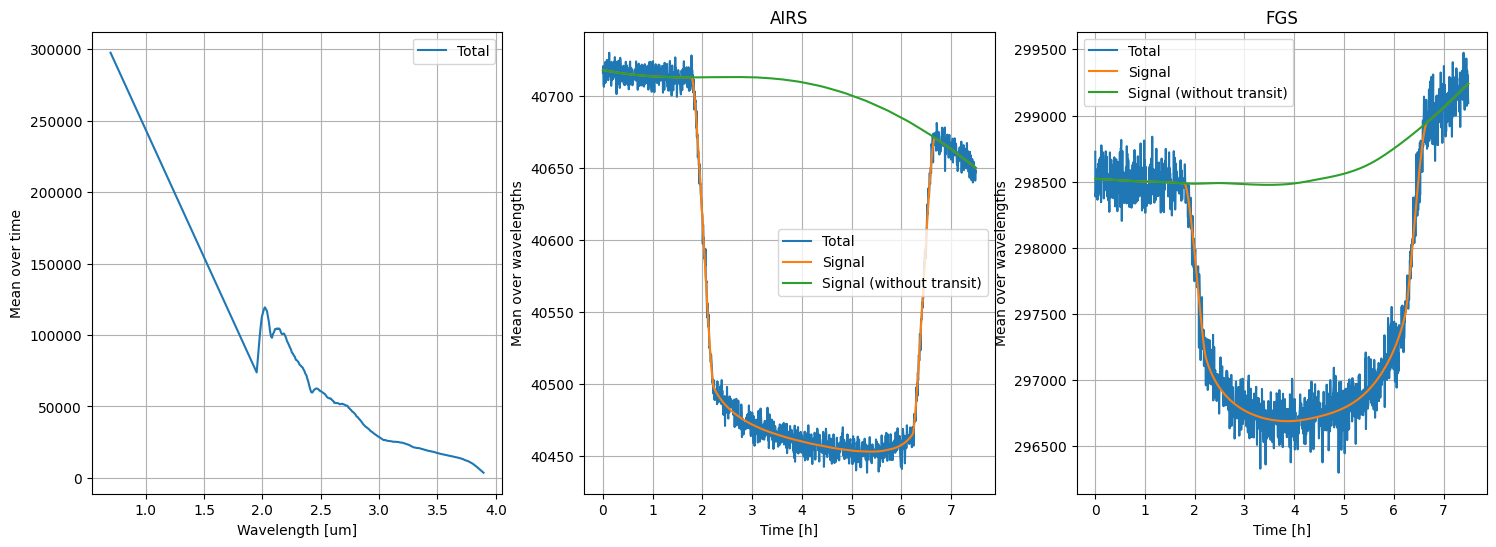

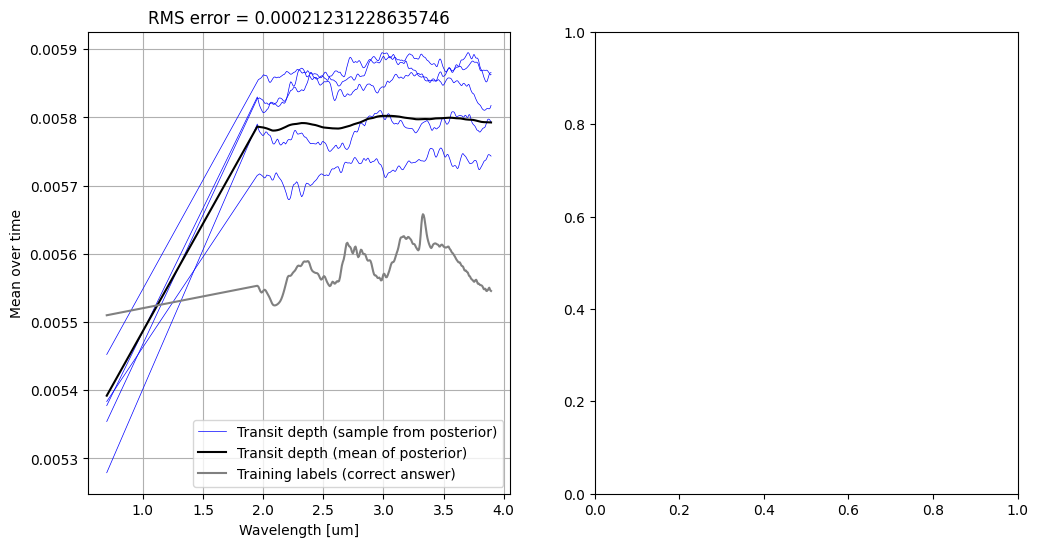

Inferring:  55%|███████████████████████████████████████▌                                | 11/20 [07:08<05:50, 38.89s/it]

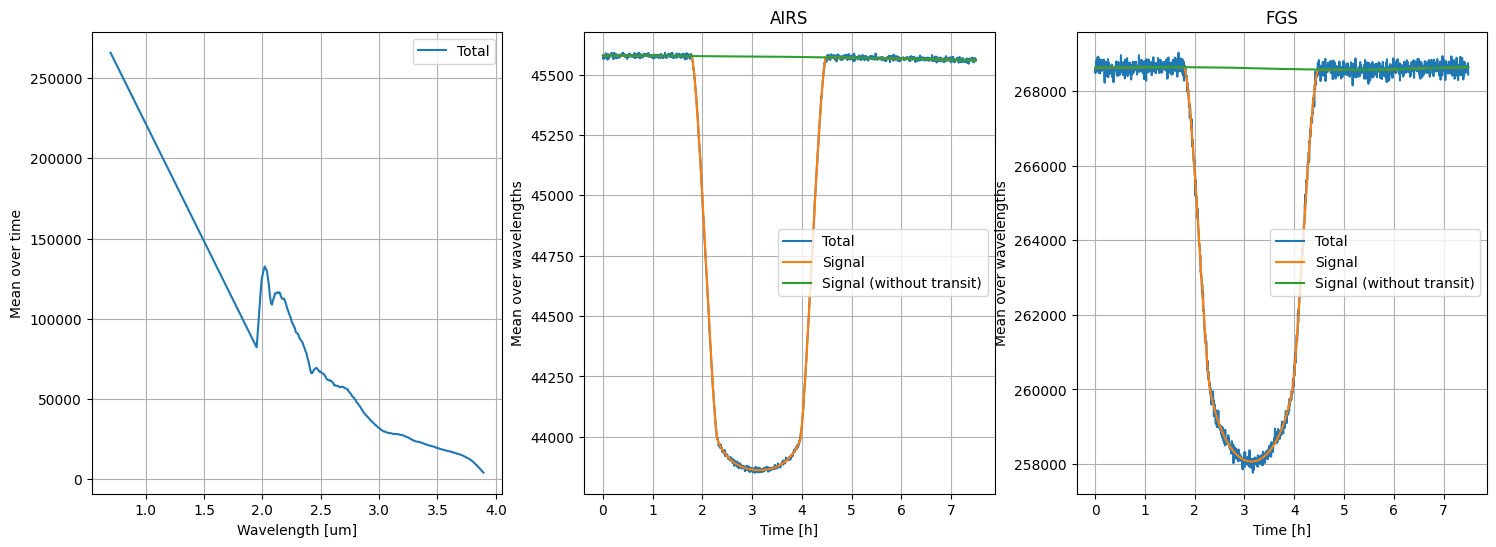

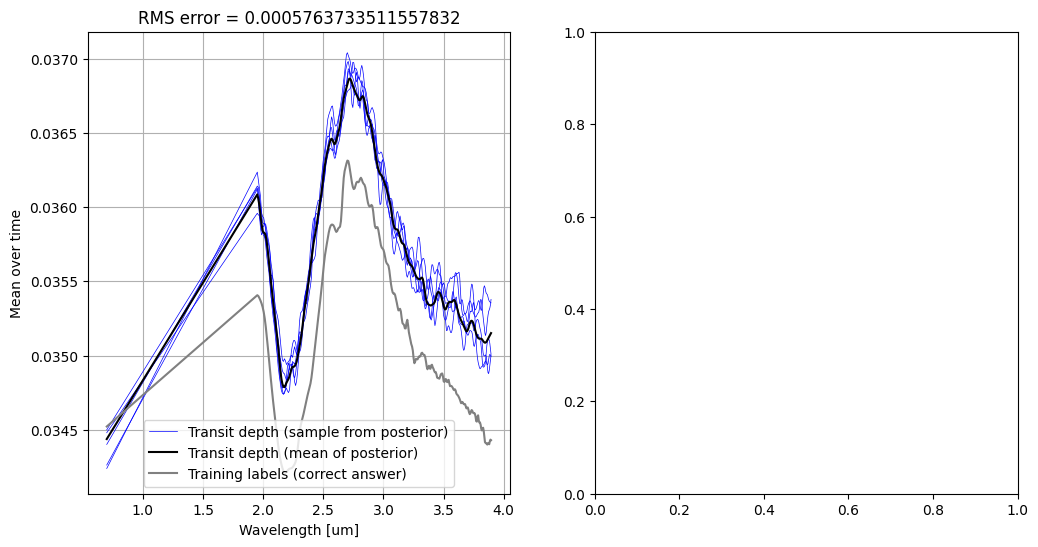

Inferring:  60%|███████████████████████████████████████████▏                            | 12/20 [07:45<05:09, 38.72s/it]

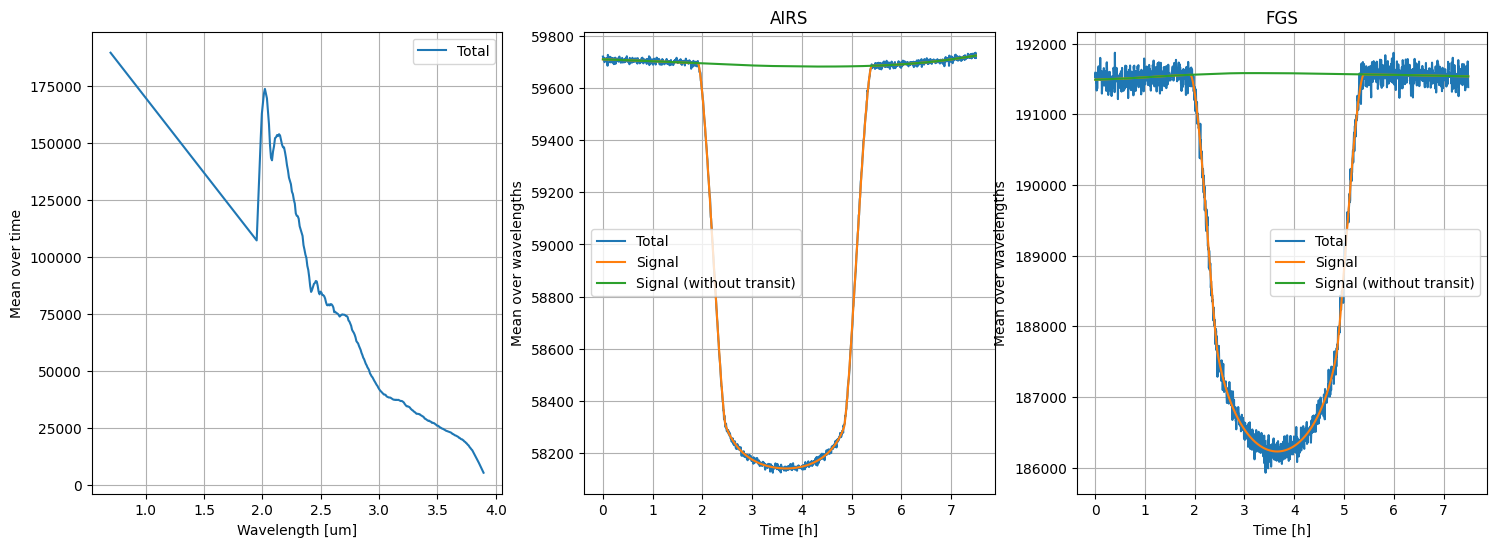

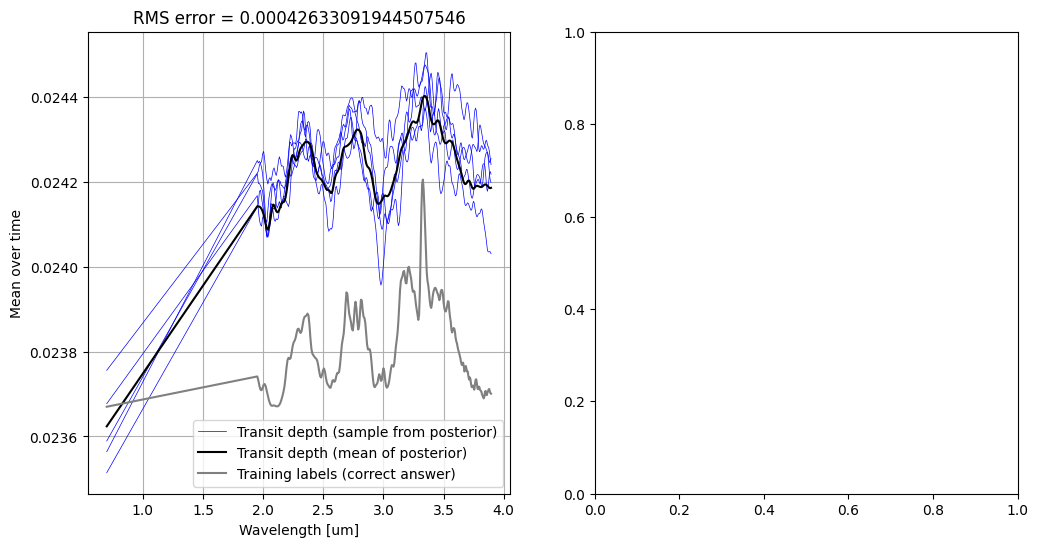

Inferring:  65%|██████████████████████████████████████████████▊                         | 13/20 [08:22<04:29, 38.51s/it]

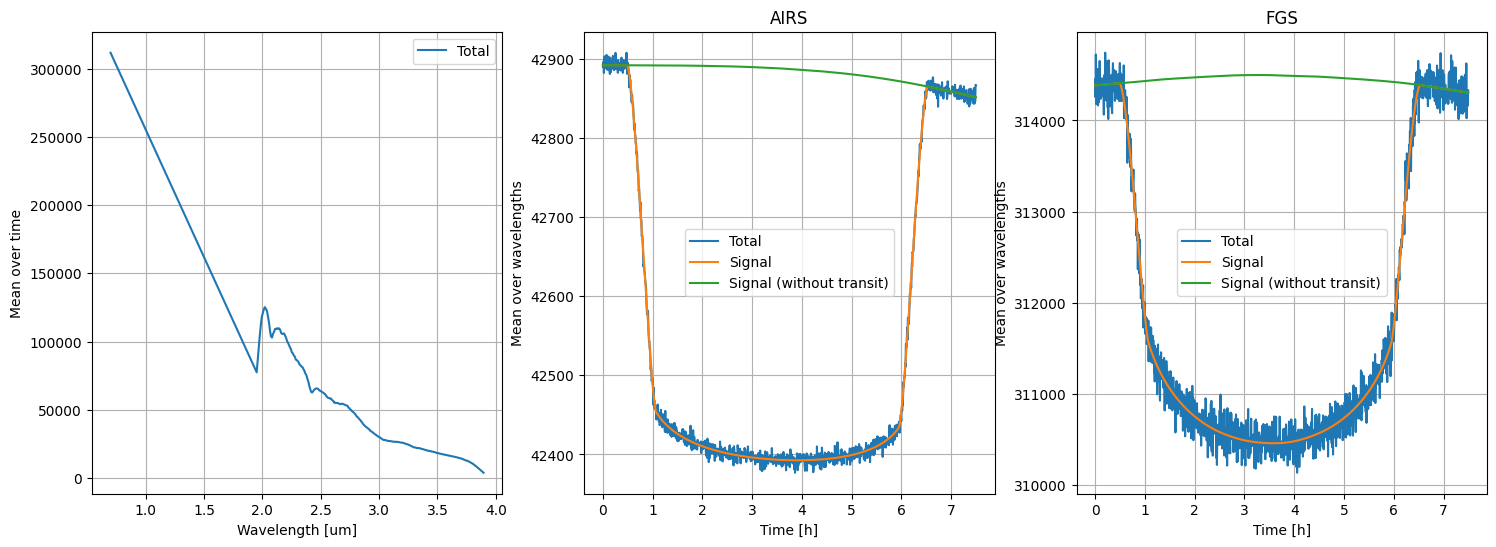

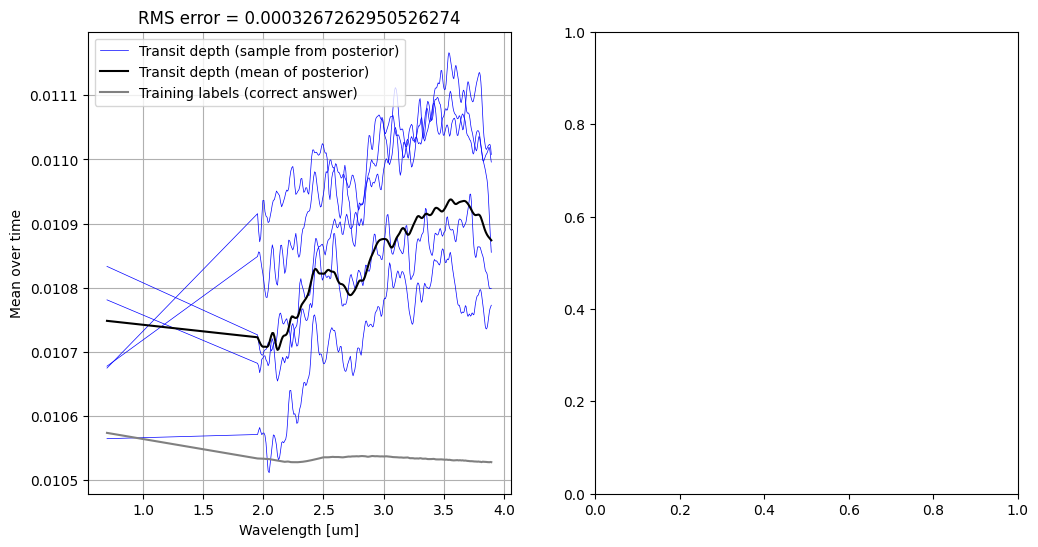

Inferring:  70%|██████████████████████████████████████████████████▍                     | 14/20 [09:05<03:53, 38.99s/it]

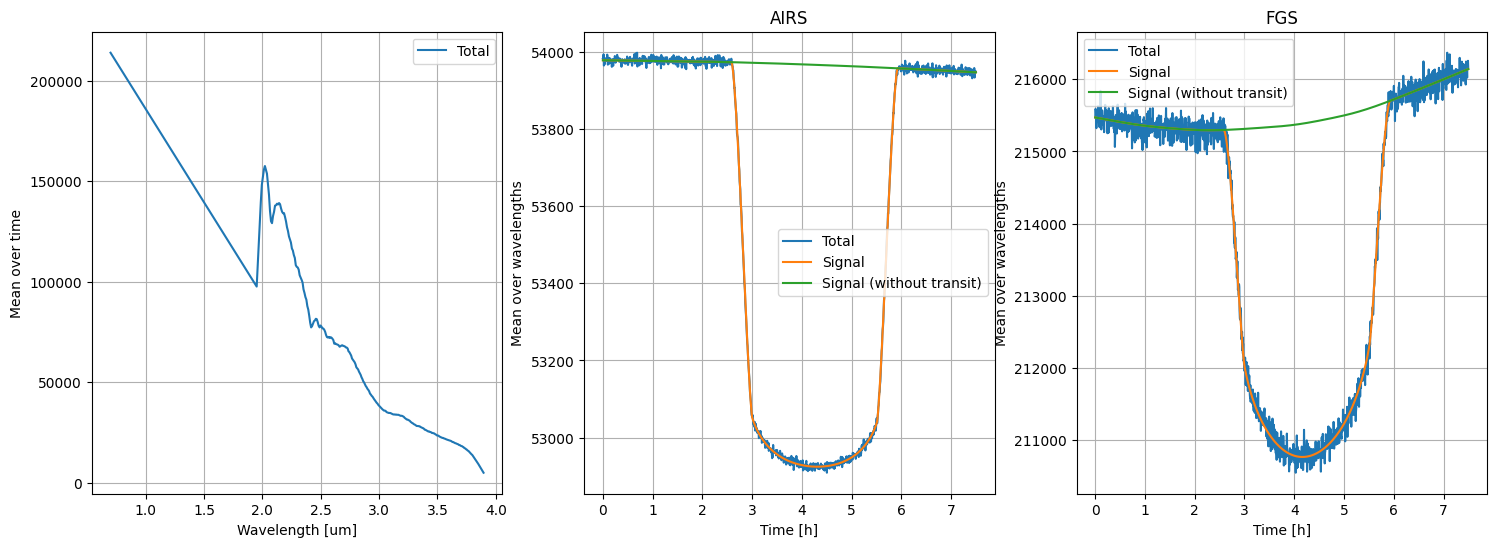

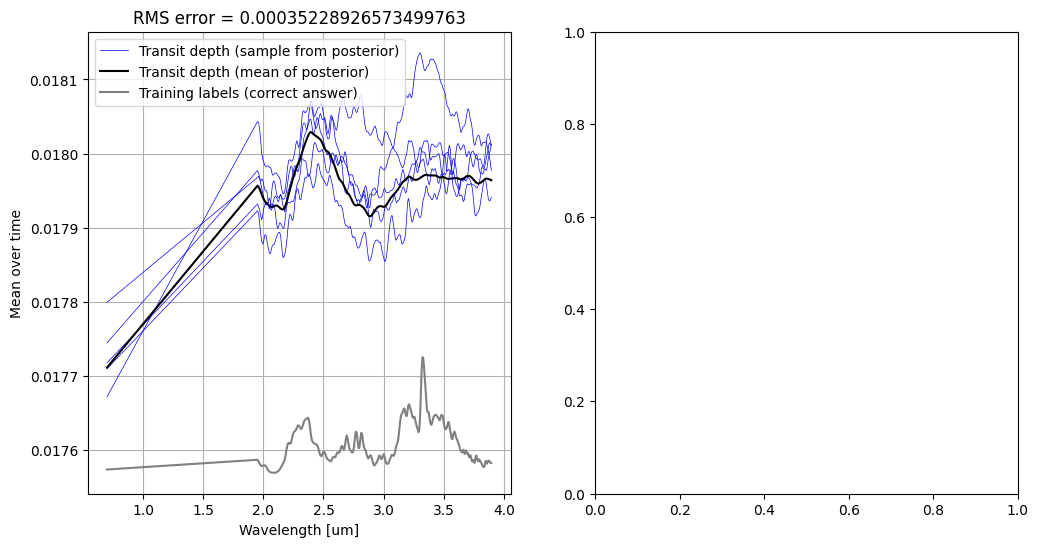

Inferring:  75%|██████████████████████████████████████████████████████                  | 15/20 [09:42<03:14, 38.81s/it]

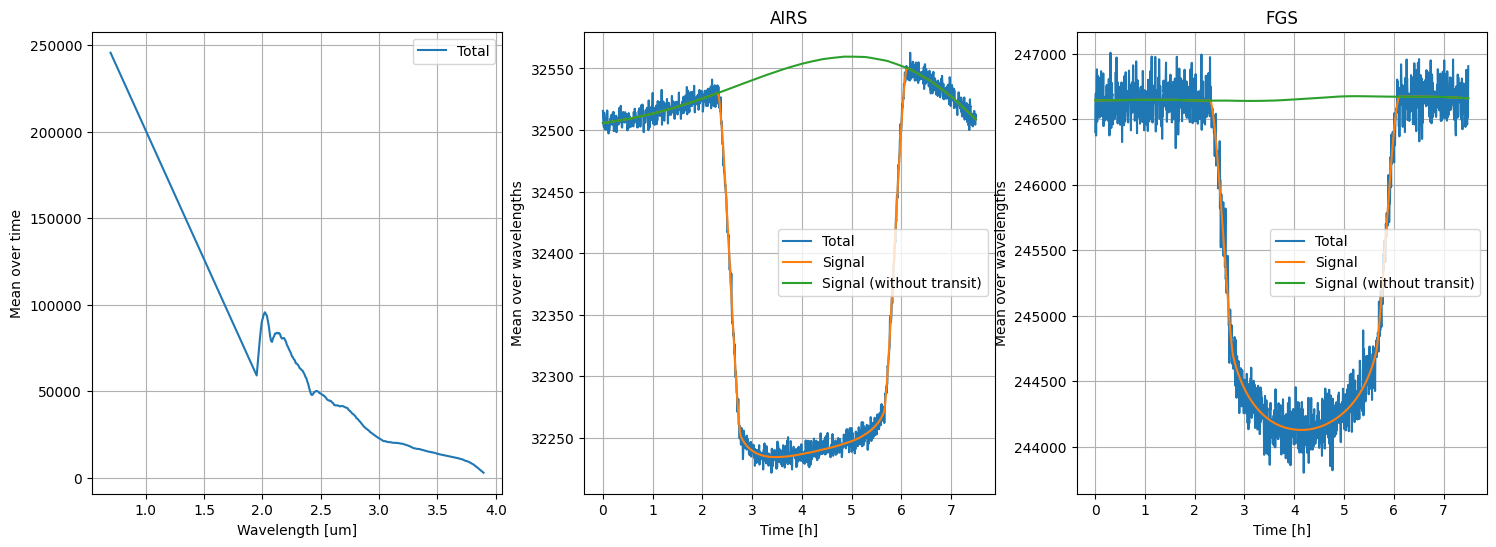

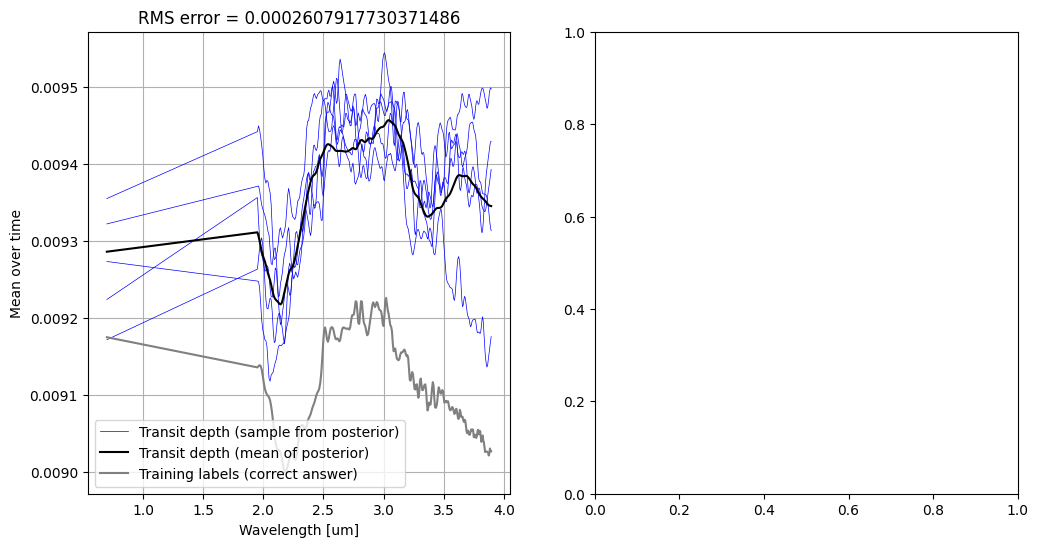

Inferring:  80%|█████████████████████████████████████████████████████████▌              | 16/20 [10:15<02:33, 38.30s/it]

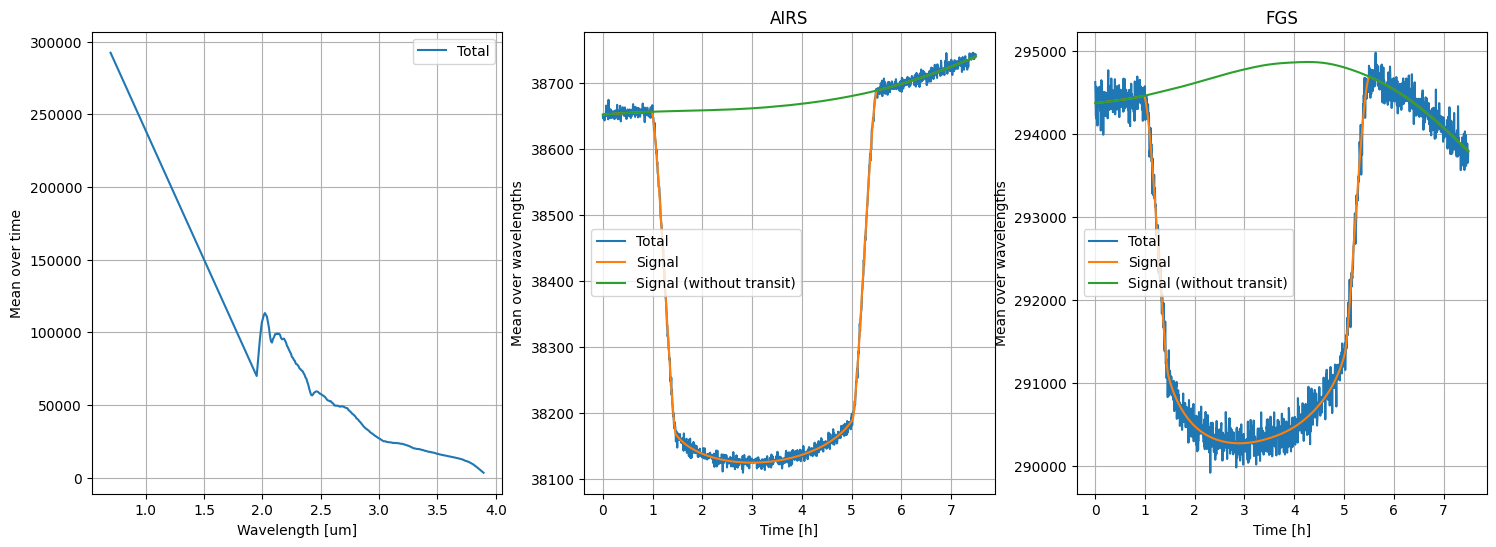

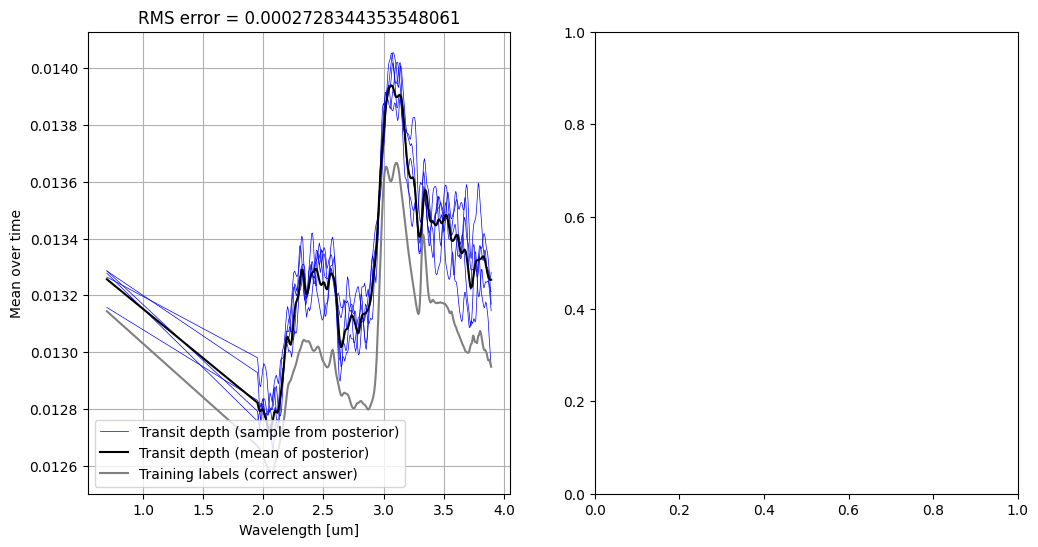

Inferring:  85%|█████████████████████████████████████████████████████████████▏          | 17/20 [10:48<01:53, 37.86s/it]

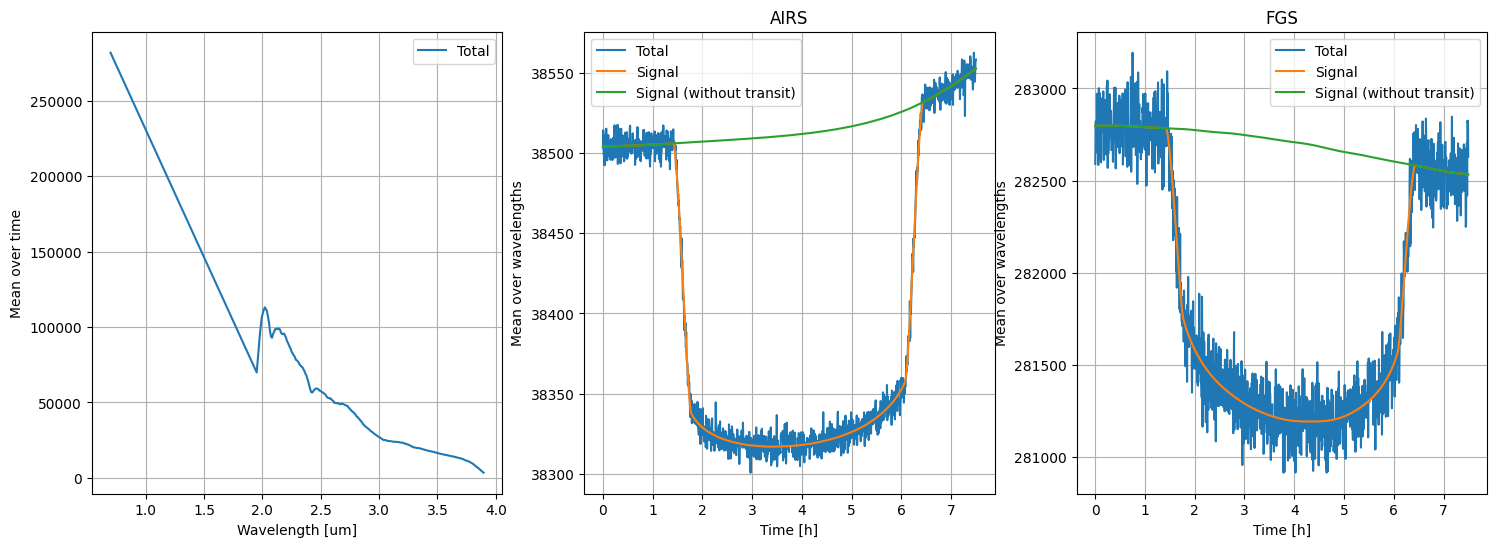

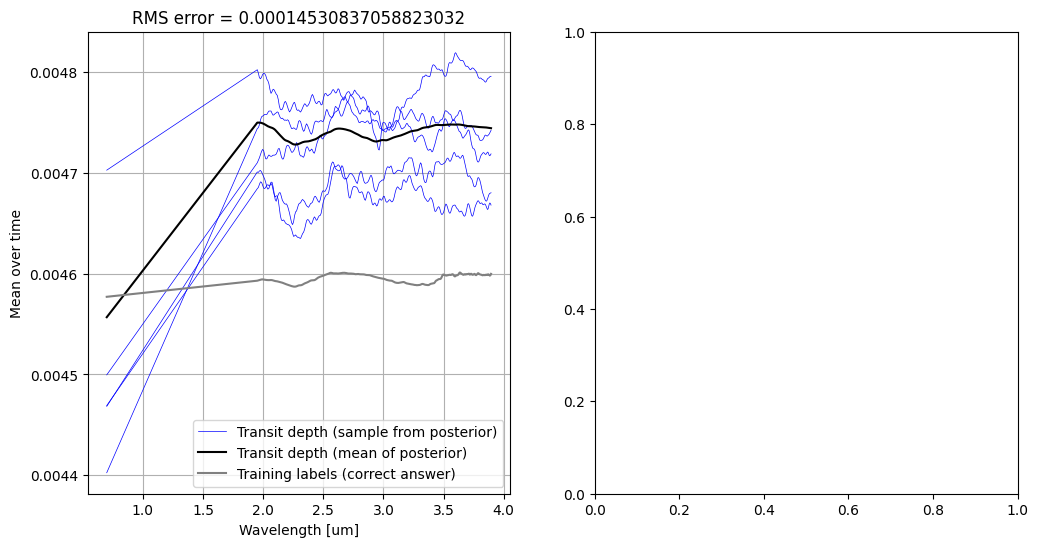

Inferring:  90%|████████████████████████████████████████████████████████████████▊       | 18/20 [11:23<01:15, 37.58s/it]

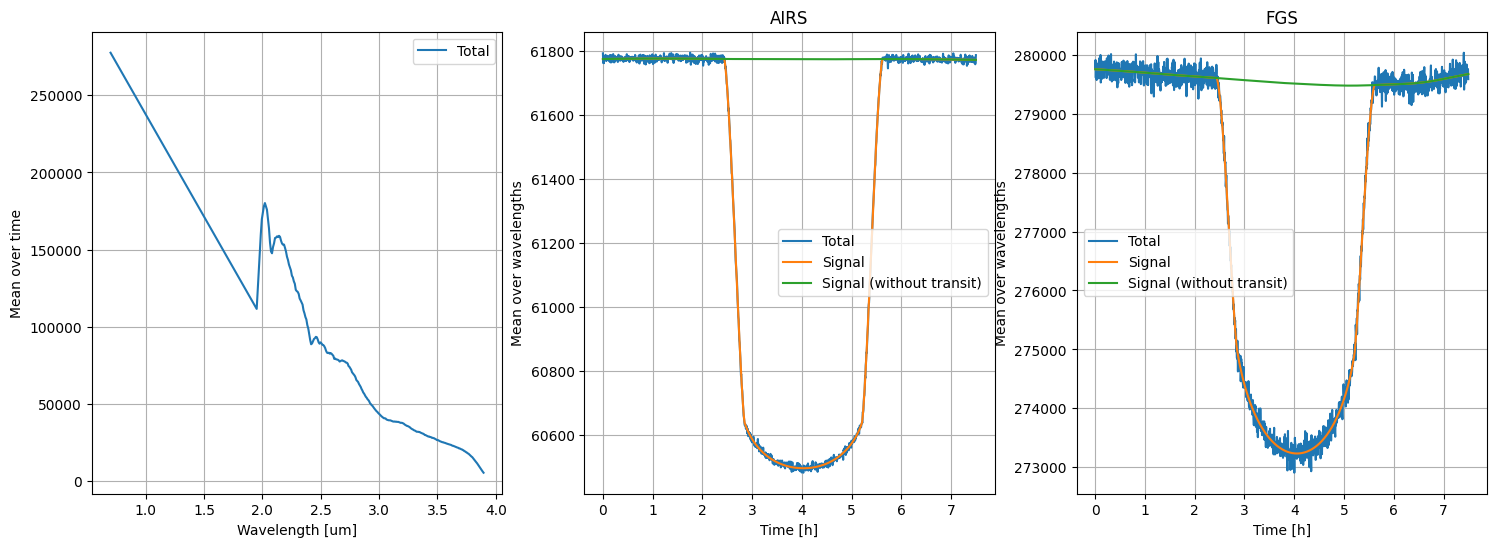

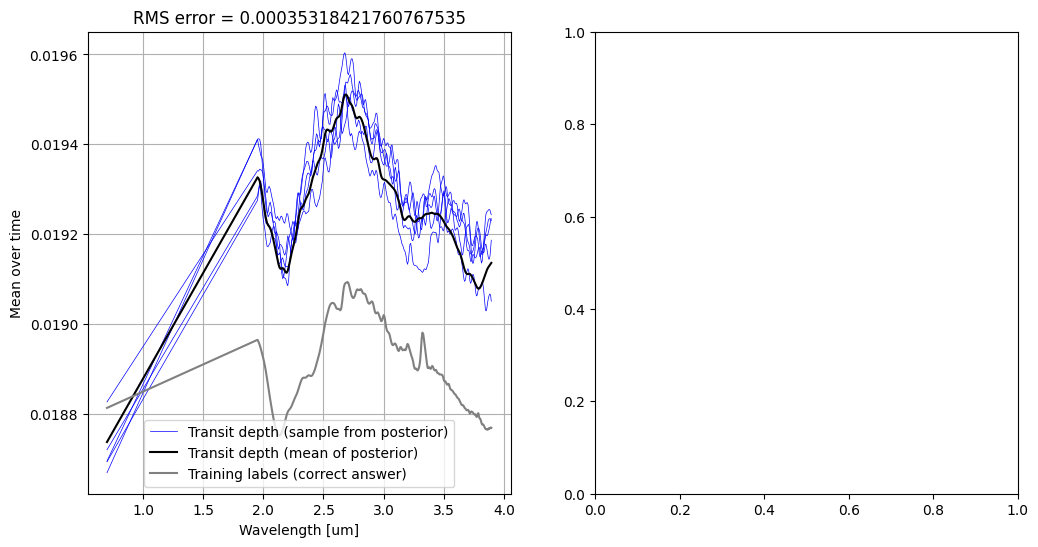

Inferring:  95%|████████████████████████████████████████████████████████████████████▍   | 19/20 [11:56<00:37, 37.21s/it]

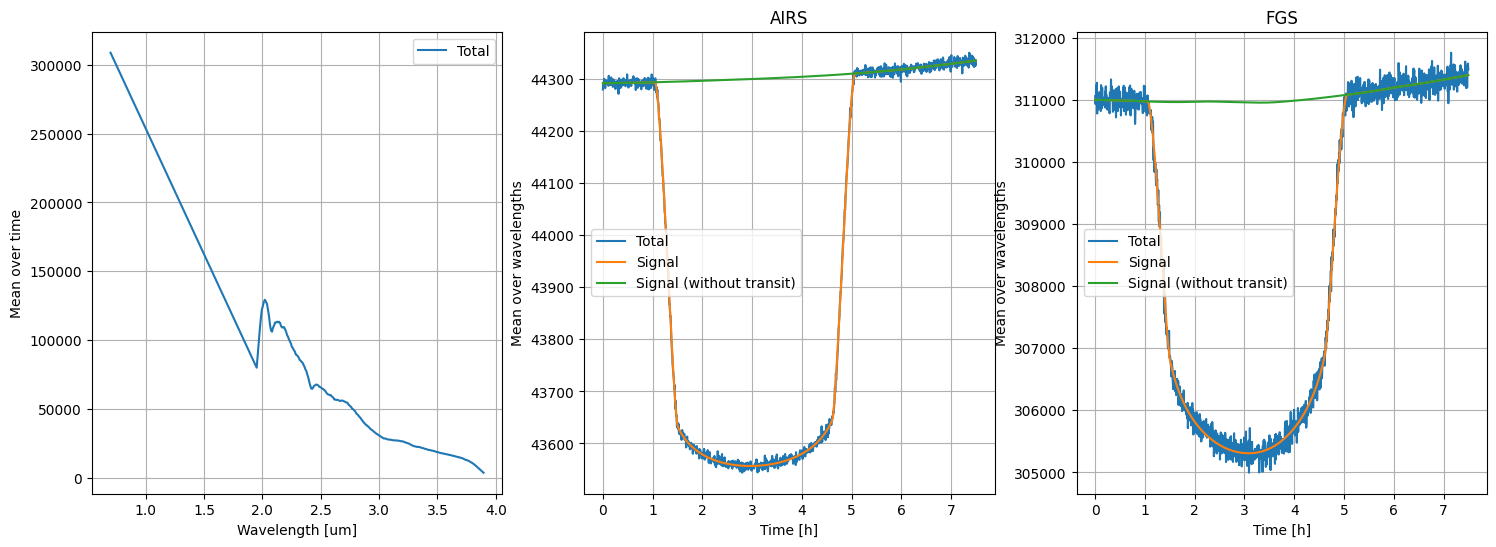

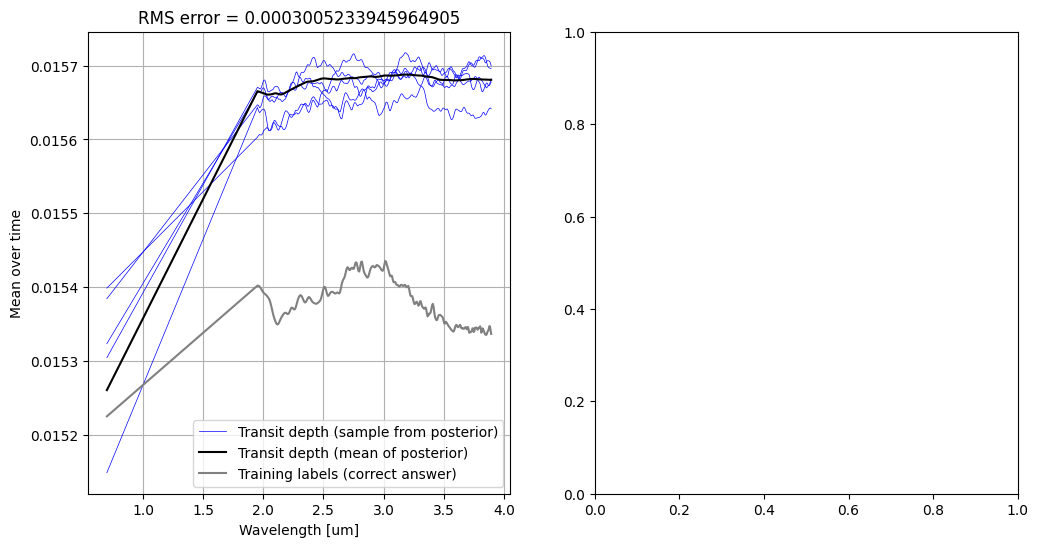

Inferring: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [12:29<00:00, 37.46s/it]


Score:          -0.8637
RMS error FGS:  127.26 ppm
RMS error AIRS: 337.43 ppm


Inferring: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]

Score:          0.4236
RMS error FGS:  175.88 ppm
RMS error AIRS: 374.17 ppm
CPU times: user 1h 36min 30s, sys: 2min 41s, total: 1h 39min 12s
Wall time: 12min 49s


(0.42358421045166667, 0.00017588156766003784, 0.00037416632211347657)

In [3]:
%%time
import gp
import ariel_gp
kgs.profiling=False
kgs.debugging_mode=1
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.n_iter = 7
model.starter_model.do_plots = False
model.plot_final = True
model.plot_simple = True
model.train(train_data)
model.starter_model.loaders[0].cache_steps = [5]
model.loaders[0].cache_steps = []
data = train_data[:20]
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
model.starter_model.do_plots = False
inferred_data_simple = model.starter_model.infer(data)
kgs.score_metric(inferred_data_simple, data)

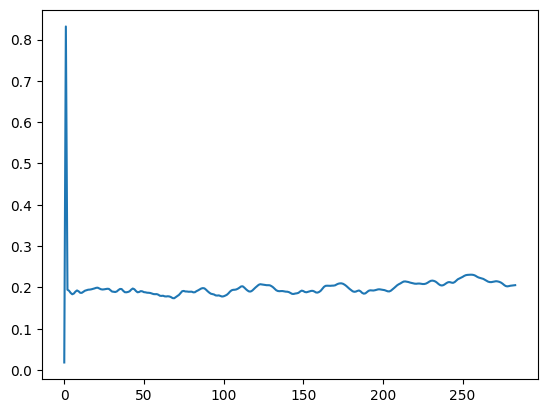

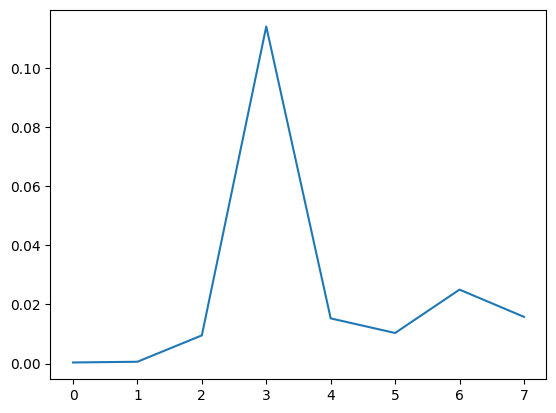

In [4]:
xx=np.std(model.results['model_samples'].m['signal'].m['transit'].get_parameters(),1)#/np.mean(model.results['model_samples'].m['signal'].m['transit'].get_parameters(),1))
plt.figure()
plt.plot(xx[:model.results['model_samples'].m['signal'].m['transit'].depth_model.number_of_parameters])
plt.figure()
plt.plot(xx[model.results['model_samples'].m['signal'].m['transit'].depth_model.number_of_parameters:])

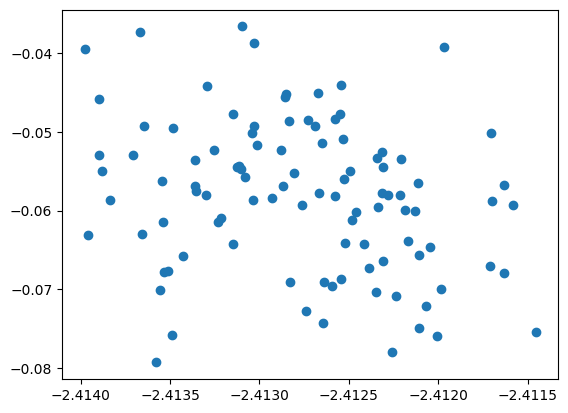

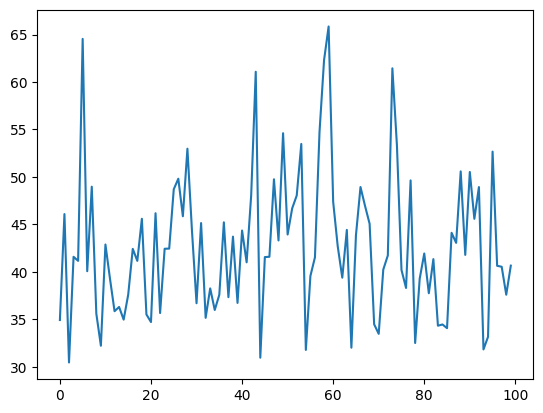

In [5]:
val1 = [x[1].to_x()[1] for x in model.results['model_samples'].m['signal'].m['transit'].transit_params]
val2 = [x[1].to_x()[2] for x in model.results['model_samples'].m['signal'].m['transit'].transit_params]
plt.figure()
plt.scatter(val1,val2)
plt.figure()
plt.plot(np.array(val1)/np.array(val2))

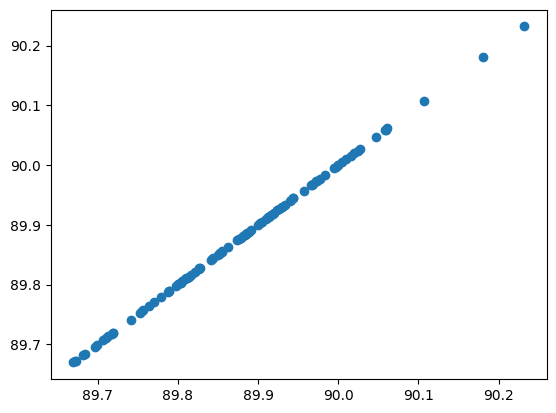

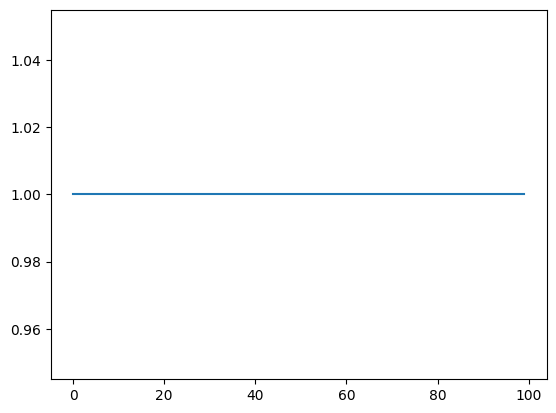

In [6]:
val1 = [x[0].i for x in model.results['model_samples'].m['signal'].m['transit'].transit_params]
val2 = [x[0].i for x in model.results['model_samples'].m['signal'].m['transit'].transit_params]
plt.figure()
plt.scatter(val1,val2)
plt.figure()
plt.plot(np.array(val1)/np.array(val2))

TransitParams(comment='', Rs=1.099853785591712, Ms=1.0225232033857206, Ts=5956.948419706603, Mp=0.6148541213707753, e=0.0, w=90.0, Rp=None, P=112.44604318538892, t0=3.058702691803045, sma=10.072768445973175, i=89.99670286321455, limb_dark='quadratic', u=array([0.41564049, 0.15155846]), expose_e_and_w=False)


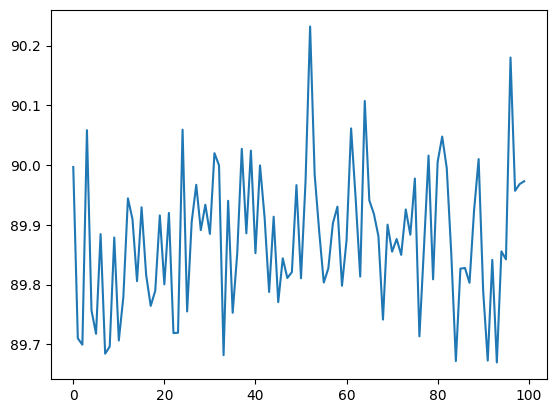

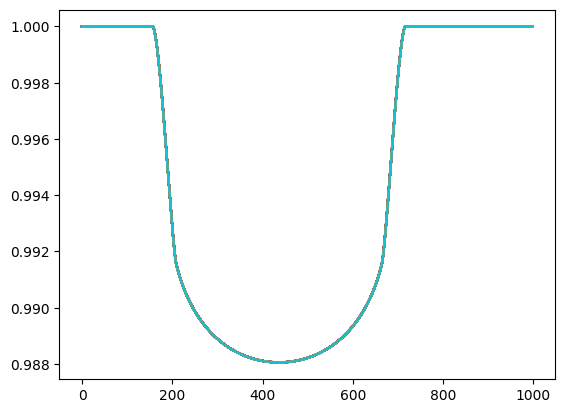

In [7]:
import copy
print(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
val = [x[0].i for x in model.results['model_samples'].m['signal'].m['transit'].transit_params]
plt.figure()
plt.plot(val)
plt.figure()
for v in val:
    T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
    T.Rp = 0.1
    #xx = T.to_x()
    #xx[2] = v
    #T.from_x(xx)
    T.i=v
    plt.plot(T.light_curve(np.linspace(0,7,1000)))

TransitParams(comment='', Rs=1.099853785591712, Ms=1.0225232033857206, Ts=5956.948419706603, Mp=0.6148541213707753, e=0.0, w=90.0, Rp=0.1, P=115.7824773151764, t0=3.058345716421649, sma=10.36944231905603, i=89.87834650495647, limb_dark='quadratic', u=array([0.40864319, 0.15021117]), expose_e_and_w=False)


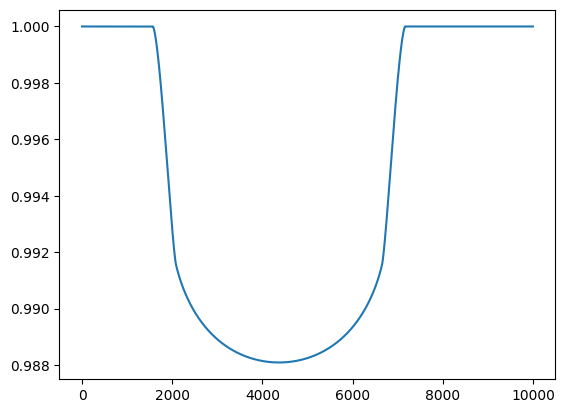

In [8]:
T=inferred_data[0].diagnostics['transit_params'][0]
T=model.results['model_mean'].m['signal'].m['transit'].transit_params[0][0]
T.Rp = 0.1
plt.plot(T.light_curve(np.linspace(0,7,10000)))
print(T)
#print(model.results['model_mean'].m['signal'].m['transit'].transit_params[0][0])

/tmp/ipykernel_32525/2943539913.py:17: RuntimeWarning: invalid value encountered in divide
  plt.semilogy(1-(mod_curve2-base_curve)/(mod_curve-base_curve))


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


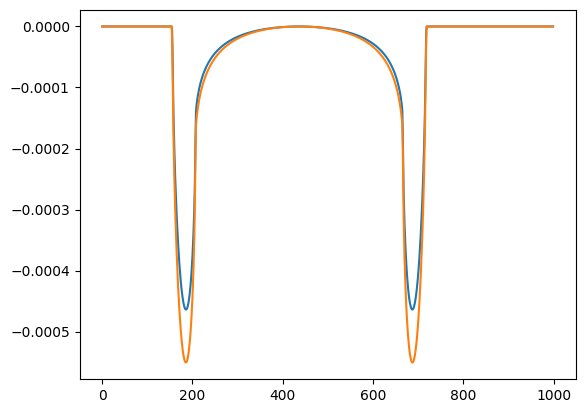

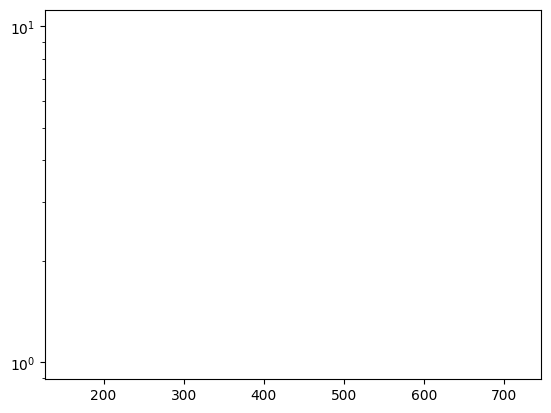

In [9]:
import copy
plt.figure()
T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
T.Rp = 0.1
base_curve = T.light_curve(np.linspace(0,7,1000))
T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
T.Rp = 0.1
T.P += 1
mod_curve = T.light_curve(np.linspace(0,7,1000))
plt.plot(mod_curve-base_curve)
T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
T.Rp = 0.1
T.sma += -0.105
mod_curve2 = T.light_curve(np.linspace(0,7,1000))
plt.plot(mod_curve2-base_curve)
plt.figure()
plt.semilogy(1-(mod_curve2-base_curve)/(mod_curve-base_curve))